<a href="https://colab.research.google.com/github/maubiazotto/estudos/blob/main/Regress%C3%A3o_linear_CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn import datasets
import pandas as pd

In [4]:
housing = pd.read_csv('housing.csv', delim_whitespace=True, header=None)
#delim_whitespace=True => indica que o separador de colunas são espaços em branco
#header=None => indica que o dataset nao tem cabeçalho

<ipython-input-4-5cc29390e7c3>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  housing = pd.read_csv('housing.csv', delim_whitespace=True, header=None)


In [5]:
#incluindo o nome das colunas no dataset:
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [6]:
#DATA SET CHARACTERISTICS:
#Data Set Characteristics:

#:Number of Instances: 506

#:Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

#:Attribute Information (in order):

# CRIM: per capita crime rate by town
# ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS: proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: nitric oxides concentration (parts per 10 million)
# RM: average number of rooms per dwelling
# AGE: proportion of owner-occupied units built prior to 1940
# DIS: weighted distances to five Boston employment centres
# RAD: index of accessibility to radial highways
# TAX: full-value property-tax rate per $10,000
# PTRATIO: pupil-teacher ratio by town
# B: 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
# LSTAT: % lower status of the population
# MEDV: Median value of owner-occupied homes in $1000's

In [7]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
X = housing.drop(columns = ['MEDV']).values #removi a coluna target e extrai apenas os valores do dataframe
Y = housing['MEDV'] #criei uma variável apenas com as variáveis target

#Caracteristica das casas
print(X)

#Preço conhecido das casas
print(Y)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


## Selecionando as técnicas de modelo (Modeling Techniques)

1. Regressão linear comum do SKLearn

[Documentação Regressão](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

2. SVR

[Documentação SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)


3. Decision tree regression do XGBoost

[Documentação XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html)

---

## Requisitos técnicos (modeling assumptions):

Serão utilizadas apenas variáveis numéricas

# TEST DESIGN

## Dataset split:

Separação de Train/Test dataset padrão com 20% de massa para teste via método SKLearn

##Métrica de avaliação do modelo:

-MSE (Mean Squared Error): Quando há poucos outliers, o MSE penaliza mais os erros grandes.

-MAE (Mean Absolute Error): Quando há muitos outliers, o MAE penaliza por igual todos os erros.

-RMSE (Root Mean Squared Error): Penaliza erros grandes como o MSE, mas tem uma escala mais comparável aos valores reais.

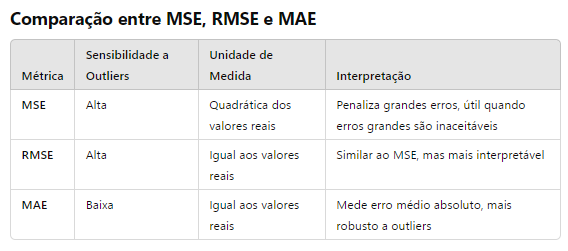


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
#test_size = significa qual o % do dataset que será usada para teste. No caso, 20% é usado para teste e 80% usada para treino (TREINO 80% / TESTE 20%)
#random_state = é a "seed" do treino. Arbirtrar um número indica que o resultado sempre será o mesmo

# TÉCNICA 1 - REGRESSÃO LINEAR

In [11]:
from sklearn.linear_model import LinearRegression

#alocando o modelo de regressao linear:
regLinear = LinearRegression()
#OBS: dentro da função LinearRegression() existem "hiper-paramentros" que determintam o comportamento da função;
#Por exemplo: sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)[source]   -> verificar a documentação para analisar cada hiper-parametro


#Treinando o modelo:
treinado = regLinear.fit(X_train, Y_train)

#o modelo poderia ser simplificado em 1 linha:
# regLinear = LinearRegression().fit(X_train, Y_train)

In [12]:
y_pred = treinado.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error
MSE_linear = mean_squared_error(Y_test, y_pred)
print(MSE_linear)

24.291119474973485


In [29]:
#para calcular o RMSE, calcular a raiz quadrada do MSE
import numpy as np
print("MSE Regressão linear = {:.3} mil dólares".format(MSE_linear))
print("RMSE Regressão linear = {:.3} mil dólares".format(np.sqrt(MSE_linear)))


MSE Regressão linear = 24.3 mil dólares
RMSE Regressão linear = 4.93 mil dólares


# TÉCNICA 2 - SUPORT VECTOR REGRESSION (SVR)

In [30]:
from sklearn.svm import SVR
regSVR = SVR().fit(X_train, Y_train)

In [31]:
ySVR = regSVR.predict(X_test)

In [32]:
MSE_SVR = mean_squared_error(Y_test, ySVR)
print("MSE SVR = {:.3} mil dólares".format(MSE_SVR))
print("RMSE SVR = {:.3} mil dólares".format(np.sqrt(MSE_SVR)))

MSE SVR = 52.8 mil dólares
RMSE SVR = 7.27 mil dólares
